The other day, my friend and I were talking about our mutual friend Jeremy. "He's an oddball," my friend Sean remarked, to which I agreed. Out of nowhere, Jeremy had just told us that he would not be coming back to Korea for the next three years. "He is just about the most random person I know." And both of us, being aspiring statistics majors, began wondering: is there a systematic way of measuirng randomness? It is from here that we went down the rabbit hole of Google and Wikipedia search. I ended up landing on entropy land, which is going to be the topic for today's post. It's a random post on the topic of randomness.

# Entropy in Science

To begin our discussion of randomness, let's take a look at how scientists measure the randomness involved in natural phenomena, such as particle movement. If you are a chemist or physicist, you might be familiar with the concept of entropy, one of the core elements of thermodynamics and a topic that recurs throughout many subfields of natural sciences. Although I'm no science major, one of the few things that I recall from high school chemistry class is the Gibbs free energy equation for calculating the spontaneity of reactions, which went as follows:

$$\Delta G = \Delta H - T \Delta S$$

where the term for entropy, denoted as $\Delta S$ satisfies the condition that

$$\Delta S = k_B \ln \Omega$$

We won't get into the details of these equations, but an intuition that we can glean from this equation is that the randomness of a particle is determined by the number of potential states that are possible for that given particle. In other words, a gas particle that freely moves across space at ATP is going to be more random than a near-static water particle composing an ice cub. We might take a step further and say that the gas particle carries a larger amount of information than the particle in a solid since more information is required to express its randomness. 

Entropy in science, denoted above as $\Delta S$, provides us with a valuable intuition on the topic of randomness and information. In fact, it is no coincidence that the notion of randomness in information theory, a subfield of math that we are going to be dipping our toes in, borrowed the term "entropy" to express randomness exhibited in data. 

# Entropy in Information Theory

Just like entropy was used to quantify randomness in the scientific phenomena, the notion of entropy is used in information theory to denote randomness in data. The origin of information entropy can be traced back to Claude Shannon's paper published in 1948, titled "A Mathematical Theory of Communication." While working at Bell Labs, Shannon was experimenting with methods to most efficiently encode and transmit data without loss of information. It is in this context that Shannon proposed the notion of entropy, which he roughly defined as the smallest possible size of lossless encoding of a message that can be achieved for transmission. 

Of course, there is a corresponding mathematical definition for entropy. But before we jump straight into entropy, let's try to  develop some preliminary intuition on the concept of information, which is the building block of entropy.

## Understanding Information

What is information? Warren Weaver, who popularized Shannon's works and together developed the field of information theory, pointed out that information is not related to what is said, but what could be said. This element of uncertainty involved in one's degree of freedom is what makes the notion of information inseparable from probabiilty and randomness. As Ian Goodfellow put it in [Deep Learning], 

> *The basic intuition behind information theory is that learning that an unlikely event has occurred is more informative than learning that a likely event has occurred.*

In other words, a low probability event expresses a lot of information, while a high probability event expresses low information as its occurrence provides little information of value to the informed. Put differently, rare events require more information to represent than common ones. Consider, for example, how we might represent the amount of information involved in a fair coin toss. We know for a fact that 

$$P(H) = P(T) = 0.5$$

where $H$ and $T$ denote the events that the coin lands on heads and tails, respectively. How might we be able to express information involved in the event that the coin lands on tails? How about heads?

There are many ways to approach this problem, but an easy way would be to use binary numbers. For example, we might ascribe meaning to 0 and 1 such that 0 represents heads and 1 represents tails. Of course, there might be other ways to encode information, such as setting 111 to heads and 000 to tails, but obviously this is wasting information. In other words, it is not the most efficient method of encoding. Even under a single digit binary number scheme, we would be able to decode a series of transmitted information without loss. 

In [21]:
def decode(data):
    result = []
    for num in data:
        if num == 0:
            result.append("H")
        else:
            result.append("T")
    return result

In [22]:
decode([0, 1, 0, 0, 1])

['H', 'T', 'H', 'H', 'T']

It is not difficult to see, therefore, that all we need to express the result of a fair coin toss is a single digit of binary numbers 0 and 1. Typically, we use [bits] to denote the number of digits required to express information in binary numbers. In this case, the information involved in $P(H)$ is equal to 1 bit; by symmetry, the same goes for $P(T)$.

If bits sounds similar to bytes or gigabytes we use for storage, you're exactly on the right path. In fact, the relationship between bit and byte is established directly by the fact that

$$8 b = 1 B$$

where $b$ denotes bits and $B$ denots bytes. This is why we use bytes to represent the amount of disk storage in computers, for instance. It is also worth mentioning that the alternative name for bits is Shannons, named eponymously after the mathematician who pioneered the field of information theory, as mentioned above. 

Now that we have some idea of what information is and how we can quantify it using binary numbers in bits, it's time to get into the math. Information can be calculated through the formula 

$$h(x) = - \log_2(p(x)) \tag{1}$$

where $h(x)$ is the information need to express the random event $X = x$, and $p(x)$ is the probability that event $x$ occurs, *i.e.* $P(X = x)$. There are different versions of this formula, such as the one that uses Euler's constant as the log base instead of 2. Whereas the unit of information as measured through (1) is in bits, that calculated through (2) as shown below is in the unit of [nats].

$$h_{nat}(x) = - \ln(p(x)) \tag{2}$$

For the purposes of this post, we will be using equation (1) instead of two. This is primarily because we will be using the binary number analogy to build an intuition for information computation. 

Let's quickly create a visualization that shows the relationship between probability and information in bits. As equation (1) describes this relationship quite concisely, let's try plotting it on a graph. 

In [18]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
from math import log2
from matplotlib import pyplot as plt
plt.style.use("seaborn")

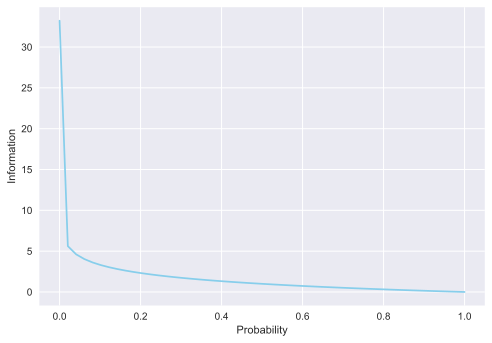

In [39]:
epsilon = 1.e-10
x_prob = np.linspace(0+epsilon, 1, 50)
y_info = [-log2(p) for p in x_prob]
plt.plot(x_prob, y_info, color = "skyblue")
plt.xlabel("Probability")
plt.ylabel("Information")
plt.show()

So that's how we calculate randomness in a random event---the amount of information that is needed to represent randomness as probability. If you think about it for a second, this is a very intuitive definition of randomness: the more random and infrequent an event is, the more information would be required to represent it. With this in mind, now we move onto the bigger picture: entropy in the context of random variables. 

## Understanding Entropy

In the previous section, we looked at how random events can be represented as information in bits. What's important here was that we were dealing with isolated random events instead of random variables. For example, in the fair coin toss example, we dealt with information involved with $P(H)$ and $P(T)$, not the binomial random variable $X$ itself. This is an important distinction to make, because entropy is essentially a probabalistically weighted average of all the random events that a random variable can take. In other words, entropy is defined as the weighted average of information given by each random event:

$$H(X) = \sum p(x) h(x) = \sum - p(x) \log_2(p(x)) \tag{3}$$

For the continuous case, we would use an integral instead.

$$H(X) = \int - p(x) \log_2(p(x)) \tag{4}$$

Say $X$ denotes the random variable of interest in a fair coin toss. Then, we are most interested in how much bits, on average, we would need to encode information generated from the distribution of this random variable. Using (3), we can easily answer this question by calculating the follows:

$$H(X) = \sum - p(x) \log_2(p(x)) = 0.5 \cdot h(H) + 0.5 \cdot h(T) = 0.5 \cdot 1 + 0.5 \cdot 1 = 1$$

This tells us that the entropy involved in a fair coin toss is 1 bit, *i.e,* on average, we only need a single digit of binary number to encode information given by a fair coin toss. But how might this number change for a biased coin? We would not expect the entropy of the random variable given by the result of a biased coin to be 1. For example, consider a coin that always lands on heads. The entropy of the random variable in this case would be exactly 0 bits, since we don't need any information to express an event that is certain. Let's try to figure out this dynamic between success probability of $p$ in a coin toss and entropy by creating a plot.

In [94]:
def entropy(p):
    if 0 in p:
        p = np.array(p) + epsilon
    return - sum(p * log2(p) for p in p)

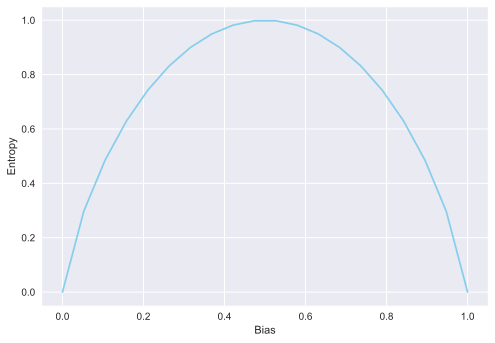

In [95]:
x_bias = np.linspace(0, 1, 20)
y_entropy = [entropy([p, 1-p]) for p in bias]
plt.plot(x_bias, y_entropy, color="skyblue")
plt.xlabel("Bias")
plt.ylabel("Entropy")
plt.show()

The first observation to make is that the graph is symmetrical. This is no surprise, since we would expect the entropy of a random variable involving a coin that lands tails with probability $p$ to be equal to that which lands on heads with equal probability $p$, *i.e.* whether the bias concerns heads or tails should not affect the calculation of entropy. Moreover, we see that the graph peaks when $p = 0.5$, meaning that a fair coin toss involves the most randomness. In other words, this translates to saying that a skewked distribution is less random and thus more predictable than a symmetric one. This makes sense, since the result of a biased coin is more predictable and less surprising than that of a fair one, with the extreme case being the coin that always lands on one side. 

Seen in this light, entropy is just the total amount of information content expressed by the distribution of a random varialbe. Because we were dealing with a very simple example of biased coins, entropy values we calculated did not go past 1 bits, but we can easily imagine situations were it might, such as a dice roll or more complicated real-life examples. In this light, entropy is one metric with which we can quantify randomness, which is the mission we set out to accomplish in this post.

# Cross Entropy and KL Divergence

But entropy is a lot more than just an interesting concept on randomness. Entropy has wide ranging applications, especially in the field of machine learning and neural networks. Among these, we will be looking at cross entropy and Kullback-Leibler (KL) divergence, two derivative concepts of entropy that are arguably most commonly used. Let's start with the big picture first---when these concepts are used, what is the relationship between the two, why they are important---and move onto the details later.

First, we have to know that cross entropy, unlike just entropy, deals with two probability distributions instead of one. Specifically, cross entropy is a way of measuring the pseudo-distance between two probability distributions. In a typical scenario, we might have a true probability distribution $P$ that we are trying to model, and our deep learning algorithm might produce some approximate probability distribution $Q$. We might evaluate the effectiveness of our model by calculating the distance between $P$ and $Q$. Seen in this light, cross entropy can be interpreted as a target [cost function] to be minimized.

Here is the equation that explains the relationship between entropy, cross entropy, and KL divergence.

$$H(P, Q) = H(P) + D_{KL}(P \parallel Q) \tag{5}$$

where $H(P, Q)$ denotes cross entropy; $H(P)$,entropy, and the last term, KL divergence. Now, let's try to understand what each of them means.

## KL Divergence

KL divergence has many interpretations. One possible definition of KL divergence is that it measures the average number of extra information content required to represent a message with distribution $Q$ instead of $P$. In [Machine Learning: A Probabalistic Perspective], Kevin P. Murphy describes KL divergence as follows:

> *... the KL divergence is the average number of extra bits needed to encode the data, due to the fact that we used distribution $q$ to encode the data instead of the true distribution $p$.*

Put differently, KL divergence is the amount of information that is lost when $Q$ is used to approximate $P$. Therefore, if $P$ and $Q$ are close, KL divergence would be low, whereas the converse would be true when the two distributions are different. We can also extend this notion a bit farther to apply it in the context of [Bayesian inference]. Recall that Bayesian inference is the process by which we start from some prior distribution and update our beliefs about the distribution with more data input to derive a posterior. In this context, KL divergence can be viewed as the amount of information gained as we move from the prior $Q$ to the posterior $P$. 

Let's derive the mathematical definition of KL divergence using likelihoods. The derivation process to be introduced is based on [this source]. We begin with the likelilhood ratio:

$$L = \frac{p(x)}{q(x)} \tag{6}$$

We can consider $L$ as representing how probable the sample $X = x$ came from distribution $P$ than $Q$, given that $x$ was sampled from some unknown distribution. If $L > 1$, the more likely it is that the data came from $P$; if $L < 1$, the more probable it is that the sample came from $Q$. 

Say we have multiple indepedent observations of data. Then, we can use (6) to compute the likelihood ratio for each sample. Calculating the product of these ratios will tell us which distribution is more likely given all available data points. In other words, 

$$L = \prod_{i = 0}^n \frac{p(x_i)}{q(x_i)}$$

A technique we saw when we were exploring the topic of [likelihood maximization] was log likelihood. Log likelihoods are useful because we can reexpress products as sums, using the property of logs. 

$$L_{log} = \sum_{i = 0}^n \log(\frac{p(x_i)}{q(x_i)}) \tag{7}$$

(7) makes sense, but it weighs all likelihood ratios equally. In reality, most samples are not equiprobable; some values are more likely than others, unless in the context of uniform distributions. To account for this, let's reframe (7) as an expected values calculation, *i.e.* give different weight to each likelihood ratio depending on the probability of observing that data point. 

$$\mathbf{E}(L_{log}) = \sum_{i = 0}^n p(x_i) \log(\frac{p(x_i)}{q(x_i)}) \tag{8}$$

Let's make (8) look better by unpacking the fraction sitting in the log function as a subtraction of two terms.

$$\mathbf{E}(L_{log}) = \sum_{i = 0}^n p(x_i) \log(p(x_i)) - \sum_{i = 0}^n p(x_i) \log(q(x_i)) \tag{9}$$

The final key is to realize the secret that 

$$\mathbf{E}(L_{log}) = D_{KL}(P \parallel Q)$$

In other words, we have derived the mathematical definition of KL divergence!

$$D_{KL}(P \parallel Q) = \sum_{i = 0}^n p(x_i) \log(p(x_i)) - \sum_{i = 0}^n p(x_i) \log(q(x_i)) \tag{10}$$

## Cross Entropy

The mathematical definition of cross entropy can simply be derived by plugging in (10) into (5). This yields 

$$H(P, Q) = H(P) + D_{KL}(P \parallel Q) = H(P) + \sum_{i = 0}^n p(x_i) \log(p(x_i)) - \sum_{i = 0}^n p(x_i) \log(q(x_i)) \tag{11}$$

Recall that the definition of entropy goes as

$$H(P) = \sum_{i = 0}^n - p(x_i) \log(p(x_i))$$

Plugging in this definition to (11) yields the simplified definition of cross entropy:

$$\begin{align*} H(P, Q) &= \sum_{i = 0}^n - p(x_i) \log(p(x_i)) + \sum_{i = 0}^n p(x_i) \log(p(x_i)) - \sum_{i = 0}^n p(x_i) \log(p(q_i)) \\ &= - \sum_{i = 0}^n p(x_i) \log(q(x_i)) \end{align*} \tag{12}$$

If KL divergence represents the average amount of additional information needed to represent an event with $Q$ instead of $P$, cross entropy tells us the average amount of total information needed to represent a stochastic event with $Q$ instead of $P$. This is why cross entropy is a sum of the entropy of the distribution $P$ plus the KL divergence between $P$ and $Q$. 

## Application of Cross Entropy

Instead of dwelling in the theoretical realm regurgitating different definitions and interpretations of cross entropy and KL divergence, let's take a look at a realistic example to gain a better grasp of these concepts. Say we have constructed a neural network to solve a task, such as MNIST hand-written digit classification. Let's say we have feeded our neural network an image corresponding to the number 2. In that case, the true distribution that we are trying to model, represented in vector form, will be `P` as shown below. The `assert` statement is there to make sure that the probabilities sum up to 1.

In [48]:
P = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
assert sum(P)

Let's assume that our neural network made the following prediction about image.

In [49]:
Q = [0.01, 0.02, 0.75, 0.05, 0.02, 0.1, 0.001, 0.02, 0.009, 0.02]
assert sum(Q)

These two distributions, although similar, are different. But the question is, how different? Creating a visualization might give us some idea about the difference between the two distributions. 

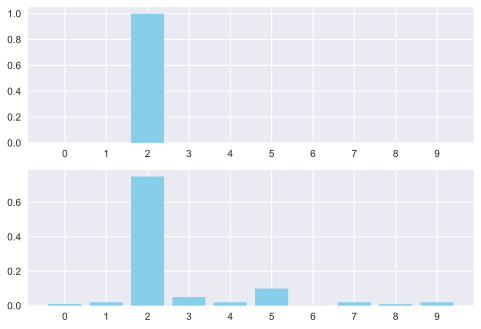

In [57]:
event = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
plt.subplot(2, 1, 1)
plt.bar(event, P, color="skyblue"); plt.xticks(event)
plt.subplot(2, 1, 2)
plt.bar(event, Q, color="skyblue"); plt.xticks(event)
plt.show()

The two distributions are quite similar, meaning that our neural network did a good job of classifying given data. However, we can get a bit more scientific by calculating the cross entropy to see exactly how well our model performed with the given data. To achieve this, let's quickly write some functions to calculate KL divergence and cross entropy. We will be reusing the `entropy` function we defined above. On a trivial note, we prevent Python from running into math domain errors, we add `epsilon` to the provided distribution if the list contains 0. 

In [106]:
def kl_divergence(p, q):
    if 0 in p:
        p = np.array(p) + epsilon
    if 0 in q:
        q = np.array(q) + epsilon
    return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))

def cross_entropy(p, q):
    return entropy(p) + kl_divergence(p, q)

In [107]:
print("Entropy: {}\nKL: {}\nCross Entropy: {}".format(entropy(P), kl_divergence(P, Q), cross_entropy(P, Q)))

Entropy: 2.975308333795324e-08
KL: 0.4150374749297422
Cross Entropy: 0.4150375046828255


The result is unsurprising. If we recall that the definition of entropy is the amount of information content needed to encode information, we will quickly realize that `P` is a distribution with probability 1, which is why it makes sense that entropy converges to 0. Therefore, in this case, KL divergence equals cross entropy, which computes to approximately 0.415.

What actually happened beneath the hood? If we recall the definition of cross entropy, we can easily see that, among the 10 terms, 9 of them were eliminated since $p(x_i) = 0$ given the setup of the distributionn `P`. In the end, the only term that mattered was the third term, which was given by 

$$- p(x_3) \log(q(x_3)) = 1 \cdot \log(0.75) \approx 0.415$$

Why does this quantity make sense as an error term defining a loss function? In other words, why is cross entropy used as a loss function in clasification tasks? To see this, let's assume that our neural network was perfect in its prediction, or more realistically, trained to excessively overfit given data, *i.e,* `P` equals `Q`. Then, cross entropy would have been calculated as 

$$- p(x_3) \log(q(x_3)) = 1 \cdot \log(1) = 0$$

Indeed, we can use our function to verify the coherency of this statement.

In [113]:
print("Entropy: {}\nKL: {}\nCross Entropy: {}".format(entropy(P), kl_divergence(P, P), cross_entropy(P, P)))

Entropy: 2.975308333795324e-08
KL: 0.0
Cross Entropy: 2.975308333795324e-08


In other words, when our predicted distribution equals the true distribution we are trying to model, cross entropy becomes 0, as a desirable cost function would behave. This is why crosss entropy is often used in classification models where we have a one-hot encoded vector that represents a true distribution, as exemplified by `P`, and a prediction that models this distribution, denoted as `Q` in our example. It is not difficult to see why cross entropy is a useful cost function frequently used in the field of machine learning. 

# Conclusion

Entropy is an interesting concept with which we can quantify randomness in data. This process is no rocket science, but simply a process that involves calculations with probabilities. Although the link may not be immediately apparent, randomness is just another way of expressing probabilites and uncertainty, and it is from this premise that information and entropy take off. 

Beyond that, however, entropy is now used extensively in the field of machine learning, specifically as a loss function. Although it was not noted explicitly above, cross entropy calculates the same quantity as the logarithmic loss function. Essentially, cross entropy is useful in that it provides us with some intuive information of how far two distributions are apart. This distance is a metric with which we can evaluate the effectiveness of our model, which also means that the effectiveness of a model will be increased as cross entropy is increasingly minimized. Machine learning is often referred to as a black box that we can simply use without much knowledge on how it works, but I personally find studying these underlying clockwork behind the hood to be much more interesting than blindly applying to to churn out numbers and predictions. 

I hope you enjoyed reading. Merry Christmas and Happy holidays!

[Deep Learning]: http://www.deeplearningbook.org
[bits]: https://en.wikipedia.org/wiki/Bit
[nats]: https://en.wikipedia.org/wiki/Nat_(unit)
[cost function]: https://en.wikipedia.org/wiki/Loss_function
[Bayesian inference]: https://jaketae.github.io/study/bayes/
[Machine Learning: A Probabalistic Perspective]: https://www.cs.ubc.ca/~murphyk/MLbook/
[this source]: https://adventuresinmachinelearning.com/cross-entropy-kl-divergence/
[likelihood maximization]: https://jaketae.github.io/study/likelihood/